Data : https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(r'C:\Users\IZU\Desktop\python vs code\ML_Practices\data\archive\Ice_cream selling data.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:

fig = px.scatter(x =df['Temperature (°C)'],y = df['Ice Cream Sales (units)'] ,color=df['Temperature (°C)'])
fig.update_layout(xaxis_title = 'Temperature (°C)',yaxis_title='Ice Cream Sales (units)',title = 'Teperature vs Ice cream Sales')
fig.show()

In [6]:
x_train,x_test,y_train,y_test = data = train_test_split(pd.DataFrame(df['Temperature (°C)']),pd.DataFrame(df['Ice Cream Sales (units)']))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(36, 1) (13, 1) (36, 1) (13, 1)


### Linnear Regression

In [7]:
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
score = mean_squared_error(y_test,y_pred)
print(f"mse : {score}")

mse : 170.9246415177355


Text(0.5, 1.0, 'predicted Linear model for polynomial Data')

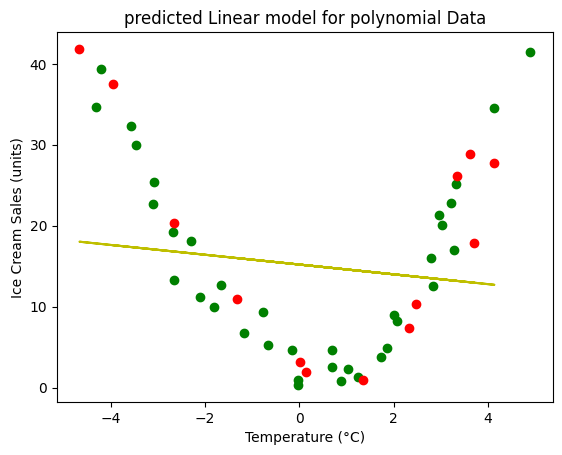

In [8]:
plt.scatter(x_train,y_train,color='g')
plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,y_pred,color='y')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('predicted Linear model for polynomial Data')

 Obviously Bad model because the data is in polynomial

In [80]:
poly = PolynomialFeatures(degree=4,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [81]:
pd.DataFrame(x_train_poly).head()

,0,1,2,3,4
0,1.0,0.688781,0.474419,0.326771,0.225074
1,1.0,2.784836,7.755314,21.597282,60.144897
2,1.0,-3.108440,9.662400,-30.034992,93.361973
3,1.0,-2.111870,4.459994,-9.418925,19.891543
4,1.0,-3.081303,9.494430,-29.255219,90.144204


In [82]:
model_poly = LinearRegression().fit(x_train_poly,y_train)
y_pred_poly = model_poly.predict(x_test_poly)
error = mean_squared_error(y_test,y_pred_poly)
print(f"mean_absolute_error : {error}")
print(f"r2 score : {r2_score(y_test,y_pred_poly)}")

mean_absolute_error : 14.566962098899047
r2 score : 0.9148338563091768


## r2 score : 0.9148338563091768

In [83]:
print(f"Coefficient : {model_poly.coef_} \n bias             : {model_poly.intercept_}")

Coefficient : [[ 0.         -1.44886703  2.33803583  0.06300835 -0.02609726]] 
 bias             : [1.8248167]


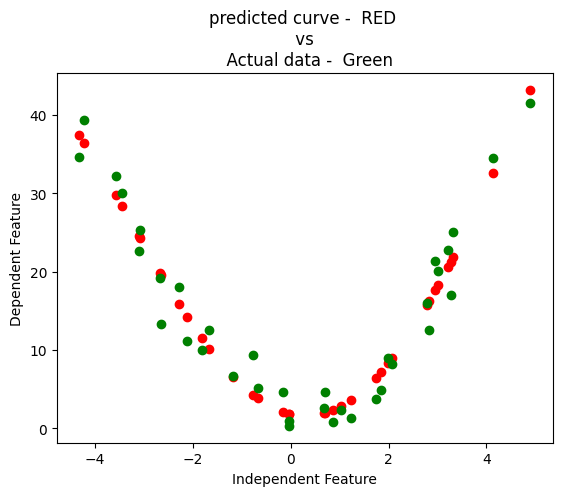

In [97]:
plt.scatter(x_train,model_poly.predict(x_train_poly),color='r')
plt.scatter(x_train,y_train,color = 'g')
#plt.plot(x_test, model_poly.predict(x_test_poly),label="Degree",linewidth=2)
#plt.plot(x_train, model_poly.predict(x_train_poly),label="Degree",linewidth=2)
plt.xlabel("Independent Feature")
plt.ylabel("Dependent Feature")
plt.title('predicted curve -  RED \n vs \n  Actual data -  Green')
plt.show()

In [ ]:
# Prediction of new data
